In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [13]:
# action sets to define the 8 actions: UP, UP-RIGHT, RIGHT, DOWN_RIGHT, 
# DOWN, DOWN_LEFT, LEFT, UP_LEFT
def move_up(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y < 250):
        new_node = [x, y+1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node
        
def move_up_right(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y < 250 and x < 400):
        new_node = [x+1, y+1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_right(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (x < 400):
        new_node = [x+1, y]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_down_right(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y > 0 and x< 400):
        new_node = [x+1, y-1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_down(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y > 0):
        new_node = [x, y-1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_down_left(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y > 0 and x > 0):
        new_node = [x-1, y-1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_left(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (x>0):
        new_node = [x-1, y]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node

def move_up_left(cur_state):
    status = False
    x = cur_state[0]
    y = cur_state[1]
    if (y < 250 and x> 0):
        new_node = [x-1, y+1]
        status = True
    else:
        new_node  = [0,0]
    return status, new_node
    

In [14]:
# function to check if the goal has reached
def check_goal(g, node):
    if(g== node):
        return True
    else:
        return False

In [15]:
#function to check if the child node is in obstacle space or not
def check_obstacle(node, o):
    flag = False
    for value in o:
        if(value == node):
            flag = True
            break
    return flag

In [16]:
#function to check if the child node is in visited or not
def check_visited(node, v):
    flag = False
    for value in v:
        if(value[2] == node):
            flag = True
            break
    return flag

In [17]:
#function to check if the child node is in open list or not
def check_open(node, c):
    flag = False
    key = 0
    for k, o in c.items():
        if(o[2] == node):
            flag = True
            key = k
            break
            
    return flag, key

In [18]:
# function to find the parent node (used in back-tracking)
def find_parent(c,visited_list):
    for i in range(len(visited_list)):
        if(visited_list[i][0] == c):
            return i
            break

In [19]:
def create_obstacles():
    
    grid_points =[]
    obstacles=[]
    obstacles_clearance = []
    x= 400
    y = 250
    a = math.sqrt(3)
    for i in range(x+1):
        for j in range(y+1):
            grid_points.append([i,j])
    # define the obstacle space
    for x,y in grid_points:
    # for the polygon
        if (x>=36 and x<=115 and y>=100 and y<= 210 ):
            if((y - (6/7)*x >= 780/7) or (y + (16/5)*x <= 2180/5 )):
                if((y + (85/69)*x >= 15825/69) and (y -(25/79)*x <=13320/79)):
                    obstacles.append([x,y])
        # Polygon space with clearance of 5
        if (x>=36-5 and x<=115+5 and y>=100-5 and y<= 210+5 ):
            if((y - (6/7)*x >= 780/7-5) or (y + (16/5)*x <= 2180/5+5)):
                if((y + (85/69)*x >= 15825/69-5) and (y -(25/79)*x <=13320/79+5)):
                    obstacles_clearance.append([x,y])

        # for the circle
        if((x-300)**2 + (y-185)**2 <= 1600):
            obstacles.append([x,y])
        # Circle with clearance of 5
        if((x-300)**2 + (y-185)**2 <= 2025):
            obstacles_clearance.append([x,y])

        # for the hexagon
        if ( x >= 165 and x <= 235 and y>= (100 - 70/a) and y<= (100 + 70/a)):
            if ((y + (2021/3500)*x >= 61273/350) and (y - (2021/3500)*x >= -19567/350 )):
                if ((y + (101/175)*x <= 179087/700) and (y - (101/175)*x <= 17487/700 )):
                    obstacles.append([x,y])
        # Hexagon with clearance of 5
        if ( x >= 165-5 and x <= 235+5 and y>= (100 - 70/a)-5 and y<= (100 + 70/a)+5):
            if ((y + (2021/3500)*x >= 61273/350 -5) and (y - (2021/3500)*x >= -19567/350 - 5)):
                if ((y + (101/175)*x <= 179087/700 +5) and (y - (101/175)*x <= 17487/700 + 5)):
                    obstacles_clearance.append([x,y])

        # padding of 5 on both x and y
        if(((x>=0) and (x<=5)) or ((x>=395) and (x<=400))):
            obstacles_clearance.append([x,y])
        if(((y>=0) and (y<=5)) or ((y>=245) and (y<=250))):
            obstacles_clearance.append([x,y])

    o = np.array(obstacles)
    oc = np.array(obstacles_clearance)
    plt.xlim(0, 400)
    plt.ylim(0, 250)
    plt.scatter(oc[:,0], oc[:,1], c = 'g', s= 1, label = 'clearance of 5')
    plt.scatter(o[:,0], o[:,1], c = 'r', s =1, label = 'obstacles')
    plt.title('Obstacle space')
    plt.savefig('Obstacle_space.png')
    plt.show()

    
    return obstacles, obstacles_clearance

In [20]:
def Dijkstra(node_queue, start, goal, obstacles_clearance):
    print('*******Starting Dijkstra Algorithm*******')
    visited_list = []
    node_index = 1 # initial node index
    parent_node = 1 #initial parent index
    node_queue.update({node_index:[0,parent_node,start]})# adding start to the open list
    while True:
    #     print(node_queue)
        min_key = min(node_queue.items(), key = lambda x:x[1][0])[0]
    #     print(min_key)
        cur_node_info = [min_key, node_queue[min_key][1], node_queue[min_key][2]]
        cur_ctc = node_queue[min_key][0]
        visited_list.append(cur_node_info)
        node_queue.pop(min_key)

        if(check_goal(goal, cur_node_info[2])):
            print('*******Goal reached*******')
            print('The total cost to reach the goal is ', cur_ctc)
            break
        else:
            s_up, node_up = move_up(cur_node_info[2])
            s_ur, node_ur = move_up_right(cur_node_info[2])
            s_r, node_r = move_right(cur_node_info[2])
            s_dr, node_dr = move_down_right(cur_node_info[2])
            s_d, node_d = move_down(cur_node_info[2])
            s_dl, node_dl = move_down_left(cur_node_info[2])
            s_l, node_l = move_left(cur_node_info[2])
            s_ul, node_ul = move_up_left(cur_node_info[2])
            if s_up:
                if((not check_obstacle(node_up, obstacles_clearance)) and (not check_visited(node_up, visited_list))):
                    ctc = cur_ctc + 1
                    stat_open, key_in_open = check_open(node_up, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]

                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_up]})
            if s_r:
                if((not check_obstacle(node_r, obstacles_clearance)) and (not check_visited(node_r, visited_list))):
                    ctc = cur_ctc + 1
                    stat_open, key_in_open = check_open(node_r, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_r]})
            if s_d:
                if((not check_obstacle(node_d, obstacles_clearance)) and (not check_visited(node_d, visited_list))):
                    ctc = cur_ctc + 1
                    stat_open, key_in_open = check_open(node_d, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_d]})
            if s_l:
                if((not check_obstacle(node_l, obstacles_clearance)) and (not check_visited(node_l, visited_list))):
                    ctc = cur_ctc + 1
                    stat_open, key_in_open = check_open(node_l, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_l]})
            if s_ur:
                if((not check_obstacle(node_ur,obstacles_clearance)) and (not check_visited(node_ur, visited_list))):
                    ctc = cur_ctc + 1.4
                    stat_open, key_in_open = check_open(node_ur, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_ur]})

            if s_dr:
                if((not check_obstacle(node_dr, obstacles_clearance)) and (not check_visited(node_dr, visited_list))):
                    ctc = cur_ctc + 1.4
                    stat_open, key_in_open = check_open(node_dr, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_dr]})

            if s_dl:
                if((not check_obstacle(node_dl, obstacles_clearance)) and (not check_visited(node_dl, visited_list))):
                    ctc = cur_ctc + 1.4
                    stat_open, key_in_open = check_open(node_dl, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_dl]})

            if s_ul:
                if((not check_obstacle(node_ul, obstacles_clearance) and not check_visited(node_ul, visited_list))):
                    ctc = cur_ctc + 1.4
                    stat_open, key_in_open = check_open(node_ul, node_queue)
                    if (stat_open):
                        if(node_queue[key_in_open][0] > ctc):
                            node_queue[key_in_open][0] = ctc
                            node_queue[key_in_open][1] = cur_node_info[0]
                    else:
                        node_index +=1
                        node_queue.update({node_index:[ctc, cur_node_info[0], node_ul]})
    return visited_list



In [21]:
def main():
    node_queue = {} #open list
    obstacles, obstacles_clearance = create_obstacles()
    correct = False
    while(not correct):
        print('Enter the start and goal locations')
        s_x = input('Enter the x coordinate of start location ')
        s_y = input('Enter the y coordinate of start location ')
        g_x = input('Enter the x coordinate of goal location ')
        g_y = input('Enter the y coordinate of goal location ')
        start = [int(s_x), int(s_y)]
        goal = [int(g_x), int(g_y)]
        if (check_obstacle(start, obstacles_clearance) or check_obstacle(goal, obstacles_clearance)):
            print('Enter the value again')
            continue
        else:
            correct = True
            visited_list = Dijkstra(node_queue, start, goal, obstacles_clearance)
            path_list = []
            path_list.append(goal)
            goal_parent = visited_list[-1][1]
            child = goal_parent
            rechd_start = False
            while True:
                index = find_parent(child, visited_list)
                path_list.append(visited_list[index][-1])
                if(visited_list[index][0] == 1):
                    break
                child = visited_list[index][1]
            print('Path generated using back-tracking')

            # Visualising the output and creatin a video file
            background = np.zeros((251,401,3),np.uint8) 
            background.fill(255)
            frameSize = (400, 250)
            fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
            out = cv2.VideoWriter('Dijkstra_visualisation.mp4',fourcc, 250, frameSize)
            #for every point that belongs within the obstacle
            for c in obstacles:
                x = c[0]
                y = c[1]
                background[(250-y,x)]=[0,0,255] #assigning a red colour for the obstacles
            background[(250 - int(s_y),int(s_x))] = [255, 0, 0]
            background[(250 - int(g_y),int(g_x))] = [0, 255, 0]
            out.write(background)
            # visualising the visited nodes
            for i in visited_list:
                x = i[2][0]
                y = 250-i[2][1]
                background[(y,x)] = [0, 255, 255]
                out.write(background)

            # visualising the path generated by back tracking
            for i in path_list:
                x = i[0]
                y = 250 - i[1]
                background[(y,x)] = [0, 0, 0]
                out.write(background)

            for i in range(1250):
                out.write(background)
            out.release()
            print('Video for visualisation created. Please check the folder.')

            v = []
            o = np.array(obstacles)
            for i in range(len(visited_list)):
                v.append(visited_list[i][2])
            m = np.array(v)
            b = np.array(path_list)
            plt.xlim(0, 400)
            plt.ylim(0, 250)
            plt.scatter(o[:,0], o[:,1], c = 'r', s = 0.5)
            plt.scatter(m[:,0], m[:,1], c = 'y', s = 0.5)
            plt.scatter(b[:,0], b[:,1], c = 'k', s = 0.5)
            plt.savefig('Final_output.png')
            plt.show()
            

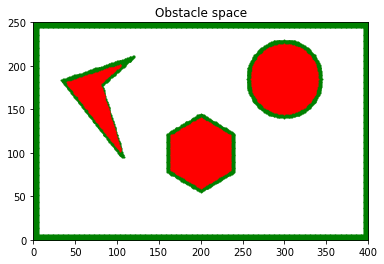

Enter the start and goal locations
Enter the x coordinate of start location 10
Enter the y coordinate of start location 10
Enter the x coordinate of goal location 50
Enter the y coordinate of goal location 50
*******Starting Dijkstra Algorithm*******
*******Goal reached*******
The total cost to reach the goal is  55.999999999999964
Path generated using back-tracking
Video for visualisation created. Please check the folder.


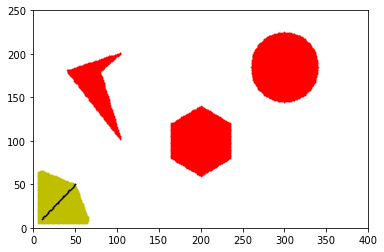

In [22]:
if __name__ == '__main__':
    main()